# 机器学习纳米学位
## 监督学习
## 项目2: 为*CharityML*寻找捐献者

欢迎来到机器学习工程师纳米学位的第二个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

在这个项目中，你将使用1994年美国人口普查收集的数据，选用几个监督学习算法以准确地建模被调查者的收入。然后，你将根据初步结果从中选择出最佳的候选算法，并进一步优化该算法以最好地建模这些数据。你的目标是建立一个能够准确地预测被调查者年收入是否超过50000美元的模型。这种类型的任务会出现在那些依赖于捐款而存在的非营利性组织。了解人群的收入情况可以帮助一个非营利性的机构更好地了解他们要多大的捐赠，或是否他们应该接触这些人。虽然我们很难直接从公开的资源中推断出一个人的一般收入阶层，但是我们可以（也正是我们将要做的）从其他的一些公开的可获得的资源中获得一些特征从而推断出该值。

这个项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Census+Income)。这个数据集是由Ron Kohavi和Barry Becker在发表文章_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_之后捐赠的，你可以在Ron Kohavi提供的[在线版本](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf)中找到这个文章。我们在这里探索的数据集相比于原有的数据集有一些小小的改变，比如说移除了特征`'fnlwgt'` 以及一些遗失的或者是格式不正确的记录。

----
## 探索数据
运行下面的代码单元以载入需要的Python库并导入人口普查数据。注意数据集的最后一列`'income'`将是我们需要预测的列（表示被调查者的年收入会大于或者是最多50,000美元），人口普查数据中的每一列都将是关于被调查者的特征。

In [1]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("census.csv")

# 成功 - 显示第一条记录
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [7]:
print data.describe()

                age  education-num  capital-gain  capital-loss  hours-per-week
count  45222.000000   45222.000000  45222.000000  45222.000000    45222.000000
mean      38.547941      10.118460   1101.430344     88.595418       40.938017
std       13.217870       2.552881   7506.430084    404.956092       12.007508
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       47.000000      13.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000


In [42]:
print len(data)
print len(data[data['capital-gain']==0])
print len(data[data['capital-loss']==0])

45222
41432
43082


In [27]:
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

for col in data.columns:
    if col not in numerical:
        print data[col].value_counts()
        

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education_level, dtype: int64
 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales    

### 练习：数据探索
首先我们对数据集进行一个粗略的探索，我们将看看每一个类别里会有多少被调查者？并且告诉我们这些里面多大比例是年收入大于50,000美元的。在下面的代码单元中，你将需要计算以下量：

- 总的记录数量，`'n_records'`
- 年收入大于50,000美元的人数，`'n_greater_50k'`.
- 年收入最多为50,000美元的人数 `'n_at_most_50k'`.
- 年收入大于50,000美元的人所占的比例， `'greater_percent'`.

**提示：** 您可能需要查看上面的生成的表，以了解`'income'`条目的格式是什么样的。 

In [2]:
# TODO：总的记录数
n_records = len(data)          #None

# TODO：被调查者的收入大于$50,000的人数
n_greater_50k = len(data[data['income']=='>50K'])         #None

# TODO：被调查者的收入最多为$50,000的人数
n_at_most_50k = len(data[data['income']=='<=50K'])        #None

# TODO：被调查者收入大于$50,000所占的比例
greater_percent = float(n_greater_50k) / n_records * 100      #None

# 打印结果
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## 准备数据
在数据能够被作为输入提供给机器学习算法之前，它经常需要被清洗，格式化，和重新组织 - 这通常被叫做**预处理**。幸运的是，对于这个数据集，没有我们必须处理的无效或丢失的条目，然而，由于某一些特征存在的特性我们必须进行一定的调整。这个预处理都可以极大地帮助我们提升几乎所有的学习算法的结果和预测能力。

### 转换倾斜的连续特征

一个数据集有时可能包含至少一个靠近某个数字的特征，但有时也会有一些相对来说存在极大值或者极小值的不平凡分布的的特征。算法对这种分布的数据会十分敏感，并且如果这种数据没有能够很好地规一化处理会使得算法表现不佳。在人口普查数据集的两个特征符合这个描述：'`capital-gain'`和`'capital-loss'`。

运行下面的代码单元以创建一个关于这两个特征的条形图。请注意当前的值的范围和它们是如何分布的。

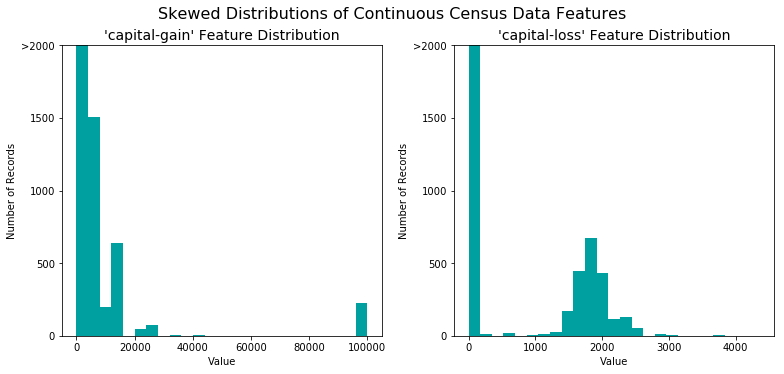

In [3]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# 可视化原来数据的倾斜的连续特征
vs.distribution(data)

对于高度倾斜分布的特征如`'capital-gain'`和`'capital-loss'`，常见的做法是对数据施加一个<a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">对数转换</a>，将数据转换成对数，这样非常大和非常小的值不会对学习算法产生负面的影响。并且使用对数变换显著降低了由于异常值所造成的数据范围异常。但是在应用这个变换时必须小心：因为0的对数是没有定义的，所以我们必须先将数据处理成一个比0稍微大一点的数以成功完成对数转换。

运行下面的代码单元来执行数据的转换和可视化结果。再次，注意值的范围和它们是如何分布的。

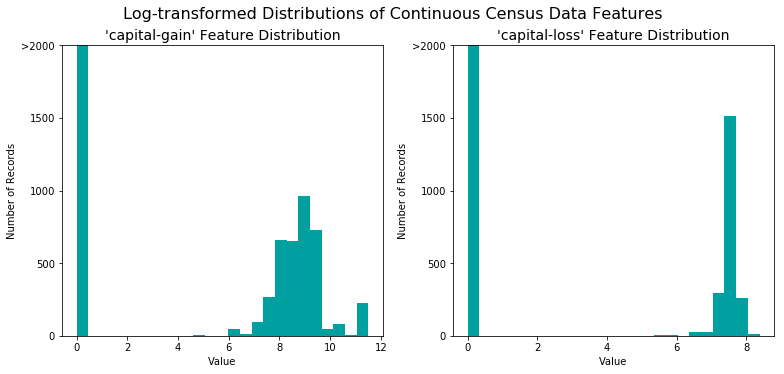

In [4]:
# 对于倾斜的数据使用Log转换
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))     # apply to both columns

# 可视化经过log之后的数据分布
vs.distribution(features_raw, transformed = True)

### 规一化数字特征
除了对于高度倾斜的特征施加转换，对数值特征施加一些形式的缩放通常会是一个好的习惯。在数据上面施加一个缩放并不会改变数据分布的形式（比如上面说的'capital-gain' or 'capital-loss'）；但是，规一化保证了每一个特征在使用监督学习器的时候能够被平等的对待。注意一旦使用了缩放，观察数据的原始形式不再具有它本来的意义了，就像下面的例子展示的。

运行下面的代码单元来规一化每一个数字特征。我们将使用[`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)来完成这个任务。

### Sklearn.preprocessing.MinMaxScaler
- Transforms features by scaling each feature to a given range.
- sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
     - feature_range : tuple (min, max), default=(0, 1)
        - Desired range of transformed data.
     - copy : boolean, optional, default True
        - Set to False to perform inplace row normalization and avoid a copy (if the input is already a numpy array).


In [52]:
# 导入sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
print 'After: '
display(features_raw.head(n = 1))

print 'Before: '
display(data.head(n=1))

After: 


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


Before: 


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### 练习：数据预处理

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码** (one-hot)方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

|   | 一些特征 |                    | 特征_A | 特征_B | 特征_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

此外，对于非数字的特征，我们需要将非数字的标签`'income'`转换成数值以保证学习算法能够正常工作。因为这个标签只有两种可能的类别（"<=50K"和">50K"），我们不必要使用独热编码，可以直接将他们编码分别成两个类`0`和`1`，在下面的代码单元中你将实现以下功能：
 - 使用[`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)对`'features_raw'`数据来施加一个独热编码。
 - 将目标标签`'income_raw'`转换成数字项。
   - 将"<=50K"转换成`0`；将">50K"转换成`1`。

### Document: pandas.get_dummies()
- Convert categorical variable into dummy/indicator variables
- pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [53]:
# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)                  # None

# TODO：将'income_raw'编码成数字值
income = pd.get_dummies(income_raw)['>50K']                         # None

# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# 移除下面一行的注释以观察编码的特征名字
print encoded

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### 混洗和切分数据
现在所有的 _类别变量_ 已被转换成数值特征，而且所有的数值特征已被规一化。和我们一般情况下做的一样，我们现在将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。

运行下面的代码单元来完成切分。

In [59]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# 显示切分的结果
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## 评价模型性能
在这一部分中，我们将尝试四种不同的算法，并确定哪一个能够最好地建模数据。这里面的三个将是你选择的监督学习器，而第四种算法被称为一个*朴素的预测器*。


### 评价方法和朴素的预测器
*CharityML*通过他们的研究人员知道被调查者的年收入大于\$50,000最有可能向他们捐款。因为这个原因*CharityML*对于准确预测谁能够获得\$50,000以上收入尤其有兴趣。这样看起来使用**准确率**作为评价模型的标准是合适的。另外，把*没有*收入大于\$50,000的人识别成年收入大于\$50,000对于*CharityML*来说是有害的，因为他想要找到的是有意愿捐款的用户。这样，我们期望的模型具有准确预测那些能够年收入大于\$50,000的能力比模型去**查全**这些被调查者*更重要*。我们能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当$\beta = 0.5$的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。

通过查看不同类别的数据分布（那些最多赚\$50,000和那些能够赚更多的），我们能发现：很明显的是很多的被调查者年收入没有超过\$50,000。这点会显著地影响**准确率**，因为我们可以简单地预测说*“这个人的收入没有超过\$50,000”*，这样我们甚至不用看数据就能做到我们的预测在一般情况下是正确的！做这样一个预测被称作是**朴素的**，因为我们没有任何信息去证实这种说法。通常考虑对你的数据使用一个*朴素的预测器*是十分重要的，这样能够帮助我们建立一个模型的表现是否好的基准。那有人说，使用这样一个预测是没有意义的：如果我们预测所有人的收入都低于\$50,000，那么*CharityML*就不会有人捐款了。

### 问题 1 - 朴素预测器的性能
*如果我们选择一个无论什么情况都预测被调查者年收入大于\$50,000的模型，那么这个模型在这个数据集上的准确率和F-score是多少？*  
**注意：** 你必须使用下面的代码单元将你的计算结果赋值给`'accuracy'` 和 `'fscore'`，这些值会在后面被使用，请注意这里不能使用scikit-learn，你需要根据公式自己实现相关计算。

### Precision and Recall
- Precision = true positive / ( true positive + false positive); 
- Recall = true positive / ( true positive + false negative); 
- Accuracy = (true positives + true negatives) / (total examples) 

In [55]:
# TODO： 计算准确率
accuracy = sum(income == 1)/float(len(income))            # None

# TODO： 使用上面的公式，并设置beta=0.5计算F-score

precision = float(sum(income == 1)) / len(income)
recall = float(sum(income == 1)) / sum(income == 1)
beta = 0.5

fscore = (1+beta**2)*(precision*recall/((beta**2)*precision+recall))# None

# 打印结果
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### 监督学习模型
**下面的监督学习模型是现在在** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **中你能够选择的模型**
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树
- 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K近邻 (KNeighbors)
- 随机梯度下降分类器 (SGDC)
- 支撑向量机 (SVM)
- Logistic回归


### 问题 2 - 模型应用

列出从上面的监督学习模型中选择的三个适合我们这个问题的模型，你将在人口普查数据上测试这每个算法。对于你选择的每一个算法：

- *描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）*
- *这个模型的优势是什么？他什么情况下表现最好？*
- *这个模型的缺点是什么？什么条件下它表现很差？*
- *根据我们当前数据集的特点，为什么这个模型适合这个问题。*

**回答： **

**1. Logistic回归**
   - Logistic回归可用于银行鉴别用户是否会按时进行信用卡还款
   - 这个模型的优势在于它可以在不提前假设数据分布的情况下，对分类的可能性进行建模。而且，在使用该模型做出预测的同时还可得到概率预测，对一些
     任务很有用
   - 这个模型的缺点在于当特征空间过大时，它的回归性能不是很好
   - 首先这是一个分类任务，而且在数据预处理阶段，我们已经给所有非数字的特征（类别变量）施加了独热编码，这是在使用Logistic回归进行预测前常
     做的工作
      
**2. 决策树**
   - 当你有一些关于某件事物的特征，想知道基于这些特征该事物属于哪一类时，均可以使用决策树算法。Eg. 通过色泽、纹路、响声等特征判定是否是一个 
     好西瓜  （cr. 周志华 《机器学习》）
   - 决策树算法的好处在于它能够提供非常直观的结果，可解释性强。
   - 决策树算法的坏处在于它十分容易产生过拟合，通常需要剪枝处理。
   - 由于当前问题是分类问题且特征较多，我们可以先使用决策树模型来训练，能够对结果有一个初步的了解而且决策树模型结果十分直观，对进一步改进模
     型也有帮助。

**3. 集成方法（Random Forest）**
   - 随机森林算法在真实世界的应用与决策树算法很类似，多用于分类任务。例如通过一个用户及各种房源的特征来预测该用户是否愿意购买某一房产。
   - 随机森林的优势是在训练模型前不需要做特征选择，能够处理很高维的数据，也就是说当数据集特征非常多的时候，它依然能有很好的训练结果
   - 它的缺点在于当训练处模型后，通常它需要相对更长的时间去做预测。因为想要预测精准，”森林“中就需要有更多的树，而更多的树会使模型变慢
   - 因为这个数据集的特征较多，用决策树模型在特征选择上可能会存在一些问题，使用随机森林模型可能更为合适。而且通常运用随机森林训练出的模型都      会获得比单纯用决策树训练更好的结果。

### 练习 - 创建一个训练和预测的流水线
为了正确评估你选择的每一个模型的性能，创建一个能够帮助你快速有效地使用不同大小的训练集并在测试集上做预测的训练和测试的流水线是十分重要的。
你在这里实现的功能将会在接下来的部分中被用到。在下面的代码单元中，你将实现以下功能：

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用样例训练集拟合学习器，并记录训练时间。
 - 用学习器来对训练集进行预测并记录预测时间。
 - 在最前面的300个*训练数据*上做预测。
 - 计算训练数据和测试数据的准确率。
 - 计算训练数据和测试数据的F-score。

In [56]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
# Documents: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
#            http://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])                                # None
    end = time() # 获得程序结束时间
    
    # TODO：计算训练时间
    results['train_time'] = end - start                 # None
    
    # TODO: 得到在测试集上的预测值
    #       然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_test = learner.predict(X_test)          # None
    predictions_train = learner.predict(X_train[:300])                                         # None
    end = time() # 获得程序结束时间
    
    # TODO：计算预测用时
    results['pred_time'] = end - start                 # None
    
    '''
    sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)[source]
    '''
    # TODO：计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    
    # TODO：计算在测试集上的准确率
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    '''
    sklearn.metrics.fbeta_score(y_true, y_pred, beta, labels=None, pos_label=1, average=’binary’, sample_weight=None)
    '''
    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
    
    # TODO：计算测试集上的F-score
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    
    # 成功
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # 返回结果
    return results

### 练习：初始模型的评估
在下面的代码单元中，您将需要实现以下功能：             
- 导入你在前面讨论的三个监督学习模型。             
- 初始化三个模型并存储在`'clf_A'`，`'clf_B'`和`'clf_C'`中。         
  - 如果可能对每一个模型都设置一个`random_state`。       
  - **注意：**这里先使用每一个模型的默认参数，在接下来的部分中你将需要对某一个模型的参数进行调整。             
- 计算记录的数目等于1%，10%，和100%的训练数据，并将这些值存储在`'samples'`中             

**注意：**取决于你选择的算法，下面实现的代码可能需要一些时间来运行！

LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


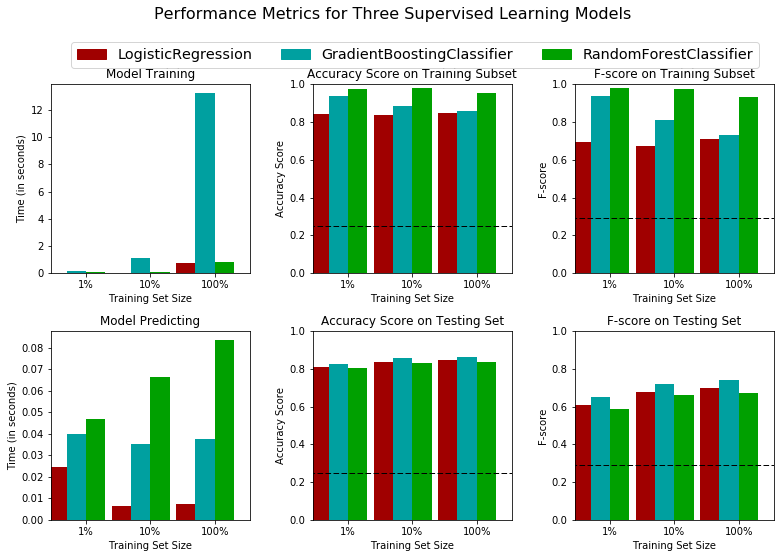

In [11]:
# TODO：从sklearn中导入三个监督学习模型
# Documents:  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#             http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#             http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier

# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# TODO：初始化三个模型
clf_A = LogisticRegression(random_state=0)                               # None
clf_B = DecisionTreeClassifier(random_state=0)                   # None
clf_C = RandomForestClassifier(random_state=0)                   # None

clf_D = AdaBoostClassifier(random_state=0)

clf_E = GradientBoostingClassifier(random_state=0)
# TODO：计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(len(X_train) * 0.01)                    # None
samples_10 = int(len(X_train) * 0.1)                    # None
samples_100 = int(len(X_train) * 1.0)                   # None

# 收集学习器的结果
results = {}
# for clf in [clf_A, clf_B, clf_C]:
# for clf in [clf_A, clf_C, clf_D]:
for clf in [clf_A, clf_C, clf_E]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, accuracy, fscore)

----
## 提高效果

在这最后一节中，您将从三个有监督的学习模型中选择*最好的*模型来使用学生数据。你将在整个训练集（`X_train`和`y_train`）上通过使用网格搜索优化至少调节一个参数以获得一个比没有调节之前更好的F-score。

### 问题 3 - 选择最佳的模型

*基于你前面做的评价，用一到两段向*CharityML*解释这三个模型中哪一个对于判断被调查者的年收入大于\$50,000是最合适的。*             
**提示：**你的答案应该包括关于评价指标，预测/训练时间，以及该算法是否适合这里的数据的讨论。

**回答：**

我认为这三个模型中，对于判断被调查者年收入大于$50,000最合适的是Logistic Regression。

首先从预测和训练时间的角度来看，随机森林模型所用的时间远超过另外两个模型，而在测试集上的准确率也并没有非常突出，所以这个模型可能并不太适合来解决这个问题。而对于剩下的两个模型，逻辑回归和决策树模型来说，虽然决策树模型在三个训练集上的训练准确率均为最高，但在测试数据上的三个结果都是最差的，这说明这个模型在训练时很可能出现了过拟合现象。而由逻辑回归模型得出的预测准确率则趋于平稳。同时，虽然决策树模型在测试集上得到的F-score最高，但由于在预处理阶段，我们将所有类别变量都进行了独热编码处理，我认为这样的数据类型还是更适合用逻辑回归模型来进行这次分类预测。


### 问题 4 - 用通俗的话解释模型

*用一到两段话，向*CharityML*用外行也听得懂的话来解释最终模型是如何工作的。你需要解释所选模型的主要特点。例如，这个模型是怎样被训练的，它又是如何做出预测的。避免使用高级的数学或技术术语，不要使用公式或特定的算法名词。*

**回答： ** 

这个模型对每条数据基于它包含的每个特征的取值，计算出这条数据会被分为某一类的概率，用这个概率来判断它会最终被分到两个类别中的哪个去。我们有特定的公式来计算这个概率。重要的一点是，在公式中我们会给每个特征加权重，而这些权重也是我们在训练模型的过程中需要不断更新最终确定的。在训练过程中，我们会将训练集的每条数据的分类结果、特征和给特征加的权重带入一个特定的公式，我们的目的是通过不断优化使这个公式得到最小的解，而在得到最小解时每个特征的权重就是我们最终模型所使用的参数。在优化的过程中，我们通常会用到梯度下降法，可以将它想象成从山顶往山脚走的过程，我们希望我们走的每一步都是下降最多的，这样可以使我们用最快的速度最直接地到达山脚，即得到最小的解。当模型训练完毕后，将测试数据的特征信息带入模型，利用之前训练得来的最优参数，计算出该数据被分为其中某一类的概率，再将此概率与我们提前自行设置的临界值作比较，预测这条数据属于哪一类。

### 练习：模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需给出并尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)和[`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 如果能够设置的话，设置`random_state`。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器（learner）有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

# 刘建平Pinard 博客
### http://www.cnblogs.com/pinard/category/894692.html

In [13]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Model: LogisticRegression

# TODO：初始化分类器
# clf = LogisticRegression(random_state = 0)                             # None
# clf = AdaBoostClassifier(random_state = 0)
clf = GradientBoostingClassifier(random_state = 0)

# TODO：创建你希望调节的参数列表
# parameters = {
#              'C':[1.0, 10.0, 100.0],
#              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag']}    # None

'''
AdaBoostClassifier 的参数有：
1. base_estimator: 我们的弱分类学习器。默认是决策树
2. algorithm: SAMME和SAMME.R， 主要区别是弱学习器权重的度量
3. n_estimators: 弱学习器的最大迭代次数。太小容易欠拟合，太大容易过拟合。常与4. learning_rate一起考虑。 默认是50
4. learning_rate: 每个弱学习器的权重缩减系数v, 0 ≤ v ≤ 1。对于同样的训练集拟合效果，较小的v意味着我们需要更多的弱学习器的迭代次数。默认是1

※ 使用AdaBoostClassifier时，还可以调节其使用的弱学习器的参数。
Eg. DecisionTreeClassifier
1. max_features: 划分时考虑的最大特征数 （None, log2, sqrt, auto）
2. max_depth: 建立子树时子树的深度
3. min_samples_split: 内部节点再划分所需最小样本数，如果某节点的样本数少于min_sample_split，则不会继续再尝试选择最优特征来进行划分。默认是2
4. min_samples_leaf: 叶子节点最少样本数。若样本量数量级非常大，推荐增大这个值。默认是1
5. min_weight_fraction_leaf: 叶子节点最小的样本权重和。若小于这个值，则会和兄弟节点一起被剪枝
6. max_leaf_nodes: 最大叶子节点数，可以防止过拟合。默认是None，若加了限制，算法会简历在最大叶子节点数内最优的决策树。若特征多，可加以限制
'''
# parameters = {
#     'base_estimator':[DecisionTreeClassifier(max_features='log2', min_samples_split=10),DecisionTreeClassifier(max_features='sqrt', min_samples_split=10), DecisionTreeClassifier(min_samples_split=10)],
#     'algorithm':['SAMME', 'SAMME.R'],
#     'n_estimators':[100, 200, 300],
#     'learning_rate':[0.6, 0.8, 0.95]
# }

'''
GradientBoostingClassifier 的参数有：
1. loss: {'deviance', 'exponential'} 我们想要优化的损失函数
2. learning_rate: default是0.1
3. n_estimators: the number of boosting stages to perform，默认是100
4. max_depth: 限制了每棵树的nodes数，默认是3 ※建议调参
5. criterion: the function to measure the quality of a split

※下面两个参数，如果是int就是个数，如果是float就是percentage
6. min_samples_split: the minimum number of samples required to split an internal node
7. min_samples_leaf: the minimum number of samples required to be at a leaf node

8. min_weight_fraction_leaf
9. subsample
10. max_features: 当我们寻找best split时参考的特征数
11. max_leaf_nodes
12. min_impurity_split: threshold for early stopping in tree growth. 
                        A node will split if its impurity is above the threshold, otherwise it is a leaf.
13. min_impurity_decrease
14. init
15. verbose
16. warm_start: boolean, default = False
17. random_state
18. presort: whether to presort the data to speed up the finding of best splits in fitting
'''

parameters = {
#     'loss':['deviance', 'exponential'],
    'learning_rate':[0.1, 0.3, 0.5, 0.7],
    'n_estimators':[80, 100, 150, 200],
    'max_depth':[2, 3, 5, 6]
}
# TODO：创建一个fbeta_score打分对象
from sklearn.metrics import fbeta_score

scorer = make_scorer(fbeta_score, beta=0.5)                          # None

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf, parameters, scorer)                               # None

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)

# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# 汇报调参前和调参后的分数
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8685
Final F-score on the testing data: 0.7477


In [14]:
print best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)


### 问题 5 - 最终模型评估

_你的最优模型在测试数据上的准确率和F-score是多少？这些分数比没有优化的模型好还是差？你优化的结果相比于你在**问题 1**中得到的朴素预测器怎么样？_  
**注意：**请在下面的表格中填写你的结果，然后在答案框中提供讨论。

#### 结果:

|     评价指标     | 基准预测器 | 未优化的模型 | 优化的模型 |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| 准确率 |        0.2478             |       0.8483            |     0.8494            |
| F-score        |     0.2917                |     0.6993              |   0.7008      |


**回答：**

我的最优模型都比没有优化的模型和朴素预测器得到的结果要好。虽然和未优化的模型相比，准确率和F-score的提升幅度并不大，但我想可能是因为我在模型的选择上还存在一些问题，或许除了逻辑回归以外还有更好的模型但是我没有选择到。（也希望老师可以给一点指点）

----
## 特征的重要性

在数据上（比如我们这里使用的人口普查的数据）使用监督学习算法的一个重要的任务是决定哪些特征能够提供最强的预测能力。通过专注于一些少量的有效特征和标签之间的关系，我们能够更加简单地理解这些现象，这在很多情况下都是十分有用的。在这个项目的情境下这表示我们希望选择一小部分特征，这些特征能够在预测被调查者是否年收入大于\$50,000这个问题上有很强的预测能力。

选择一个有`feature_importance_`属性（这是一个根据这个选择的分类器来对特征的重要性进行排序的函数）的scikit学习分类器（例如，AdaBoost，随机森林）。在下一个Python代码单元中用这个分类器拟合训练集数据并使用这个属性来决定这个人口普查数据中最重要的5个特征。

### 问题 6 - 观察特征相关性

当**探索数据**的时候，它显示在这个人口普查数据集中每一条记录我们有十三个可用的特征。             
_在这十三个记录中，你认为哪五个特征对于预测是最重要的，你会怎样对他们排序？理由是什么？_

**回答：**

我认为对预测最重要的五个特征应是 Capital-Gain，Capital-Loss, Hours-per-Week, Education_Level和Age。 一般来讲，Capital Gain高的人收入就会高，而Capital-Loss高的人收入就会相对低，每周工作时间更长的人在时薪一样的情况下收入也会更高。除此之外，教育程度高、年纪更大的人更有可能获得一份收入高的工作。

### 练习 - 提取特征重要性

选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

在下面的代码单元中，你将要实现以下功能：
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的`'.feature_importances_'`提取特征的重要性。

In [65]:
features_nochange = data.drop('income', axis=1)
features_nochange = pd.get_dummies(features_nochange)
# features_nochange[skewed] = data[skewed].apply(lambda x: np.log(x + 1))     # apply to both columns

In [66]:
X_train_nochange, X_test_nochange, y_train_nochange, y_test_nochange = train_test_split(features_nochange, income, test_size = 0.2, random_state = 0)

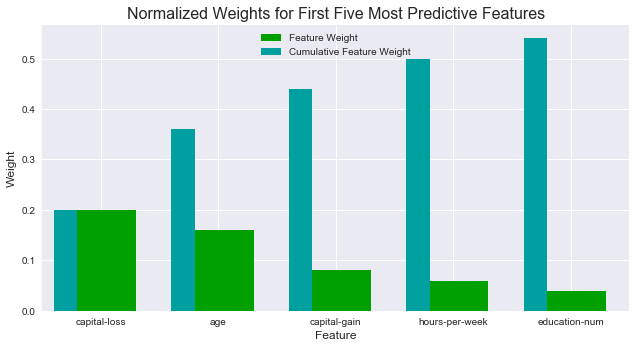

In [72]:
# TODO：导入一个有'feature_importances_'的监督学习模型
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# TODO：在训练集上训练一个监督学习模型
clf = AdaBoostClassifier(random_state=0)
# clf = RandomForestClassifier(random_state=0)
model = clf.fit(X_train, y_train)      # None

# TODO： 提取特征重要性
importances = model.feature_importances_                                   # None

# 绘图
vs.feature_plot(importances, X_train, y_train)

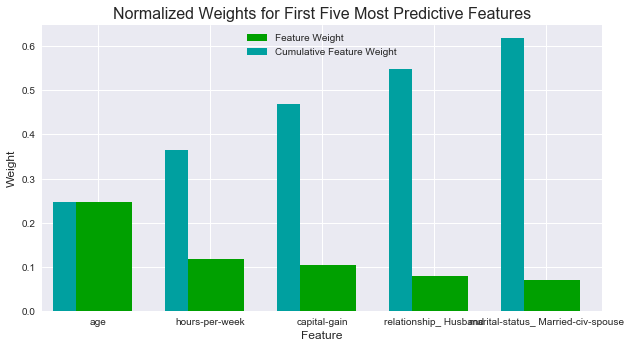

In [67]:
model1 = clf.fit(X_train_nochange, y_train_nochange)

importances_1 = model1.feature_importances_

vs.feature_plot(importances_1, X_train_nochange, y_train_nochange)

In [70]:
y_pred = model1.predict(X_test_nochange)

print fbeta_score(y_test, y_pred, beta=0.5)
print accuracy_score(y_test, y_pred)

0.6728934418
0.838253178552


### 问题 7 - 提取特征重要性
观察上面创建的展示五个用于预测被调查者年收入是否大于\$50,000最相关的特征的可视化图像。
_这五个特征和你在**问题 6**中讨论的特征比较怎么样？如果说你的答案和这里的相近，那么这个可视化怎样佐证了你的想法？如果你的选择不相近，那么为什么你觉得这些特征更加相关？_

**回答：**

从可视化图像中可以看出我的选择和答案还是较为接近的，除了在表示教育程度的特征中，对模型更为重要的是在学校学习的时间长度，而不是单纯的教育程度，但我认为这是因为Education_Level是一个类别变量，而学习时间是用整数表示。其余四个特征虽然我选择正确，但在重要性的排序上和模型给出的并不一致，从可视化结果来看，一个人的Capital-Loss和年纪比他的Capital-Gain及每周工作时长更能决定这个人的工资水平。

### 特征选择

如果我们只是用可用特征的一个子集的话模型表现会怎么样？通过使用更少的特征来训练，在评价指标的角度来看我们的期望是训练和预测的时间会更少。从上面的可视化来看，我们可以看到前五个最重要的特征贡献了数据中**所有**特征中超过一半的重要性。这提示我们可以尝试去*减小特征空间*，并简化模型需要学习的信息。下面代码单元将使用你前面发现的优化模型，并*只使用五个最重要的特征*在相同的训练集上训练模型。

In [15]:
# 导入克隆模型的功能
from sklearn.base import clone

# 减小特征空间
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# 在前面的网格搜索的基础上训练一个“最好的”模型
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# 做一个新的预测
reduced_predictions = clf.predict(X_test_reduced)

# 对于每一个版本的数据汇报最终模型的分数
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8494
F-score on testing data: 0.7008

Final Model trained on reduced data
------
Accuracy on testing data: 0.8096
F-score on testing data: 0.6013


### 问题 8 - 特征选择的影响

*最终模型在只是用五个特征的数据上和使用所有的特征数据上的F-score和准确率相比怎么样？*  
*如果训练时间是一个要考虑的因素，你会考虑使用部分特征的数据作为你的训练集吗？*

**回答：**
在只使用五个特征的数据上得出的模型在F-score和准确率上都不如使用所有特征数据得来的模型，我们的完整特征有103个，从上面可视化结果可看出，虽然这五个最重要的特征的总weight接近0.5，占所有特征的一半，但仍有一半的问题是这五个特征无法很好解释的。所以，为了节约训练时间只选择最重要的五个特征来训练，我认为是不合理的。

> **注意：** 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。